<center><h3>Uvod u podatkovnu znanost</h3></center>

<center><h1>Analiza šumskih požara u Europi</h1></center>

<center><h4>Dino Biuk Rosić</h4></center>
Seminar se bavi proučavanjem šumskih požara, faktora koji utječu na njih i kako su ti faktori međusobno povezani. Podaci su preuzeti sa službene stranice <a href = "https://effis.jrc.ec.europa.eu/apps/effis.statistics/">EFFIS-a</a> (European Forest Fire Information System).

#### Poglavlja:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Postavljanje okoline i dohvaćanje podataka<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Analiza požara po državama <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Broj požara po datumima <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Termalne anomalije (VIIRS i MODIS) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. Emisijski plinovi <br>   
## 1. Postavljanje okoline i dohvaćanje podataka
Instalacija potrebnih biblioteka i dodavanje potrebnih .csv datoteka

    

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

fires = pd.read_csv("burnt_area_2006_2023.csv")
nmb_of_fires = pd.read_csv("number_of_fires_2006_2023.csv")
#Number of fires per week
weekly_fires = pd.read_csv("seasonal-trend_ba_EU_2006_2023_2023.csv")
#Technologies used to detect fires
modis = pd.read_csv("ta-modis_EU_2012_2023_2023.csv")
viirs = pd.read_csv("ta-viirs_EU_2012_2023_2023.csv")
viirs_acum = pd.read_csv("tacum-viirs_EU_2012_2023_2023.csv")
#Carbon emissions
total_carbon = pd.read_csv("total_carbon_2003_2023_2023.csv")
total_carbon_acum = pd.read_csv("total_carbon_acum_2003_2023_2023.csv")
c02 = pd.read_csv("emissions_co2_EU_2003_2023_2023.csv")
ch4 = pd.read_csv("emissions_ch4_EU_2003_2023_2023.csv")


fires.head()
nmb_of_fires.head()

,ISO3,Country,Country area (ha),Date Range,Annual Avg.,Year 2023
0,AUT,Austria,8385823,[2006 - 2023],0.44,5.0
1,BEL,Belgium,3070746,[2006 - 2023],1.06,2.0
2,BGR,Bulgaria,11158767,[2006 - 2023],25.67,73.0
3,HRV,Croatia,5707857,[2006 - 2023],36.67,13.0
4,CYP,Cyprus,571965,[2006 - 2023],5.56,9.0


## 2. Analiza požara po državama
Prosječna godišnja veličina područja zahvaćena požarima u državama Europske Unije (2006-2023) u hektrima (ha).

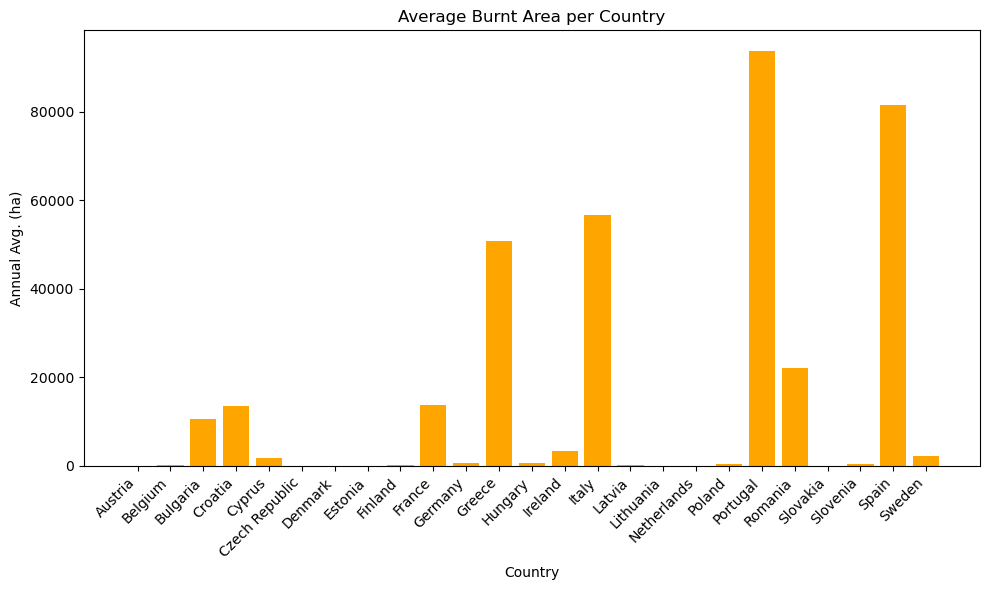

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(fires['Country'], fires['Annual Avg. (ha)'], color = 'orange')
plt.xlabel('Country')
plt.ylabel('Annual Avg. (ha)')  
plt.title('Average Burnt Area per Country') 
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Kao što se može primjetiti, neka područja su znatno više zahvaćena požarima iako su šume površinom zastupljene u velikom postotku. Države koje su sjevernije, imaju znatno manje požara. I za razliku od država koje imaju znatno više požara, ljudska greška mora biti puno veća kako bi došlo do požara zbog klimatskih uvjeta.

In [10]:
filtered_fires = nmb_of_fires[nmb_of_fires['Annual Avg.'] < 13]
countries_with_less_fires = filtered_fires['Country'].tolist()

result_new = filtered_fires[['Country', 'Annual Avg.']]
result_df = pd.DataFrame({'Countries with less fires': countries_with_less_fires})
print(result_new)

           Country  Annual Avg.
0          Austria         0.72
1          Belgium         1.17
4           Cyprus         6.06
5   Czech Republic         0.11
6          Denmark         1.06
7          Estonia         0.56
8          Finland         1.44
10         Germany         5.56
12         Hungary         4.06
13         Ireland        12.39
15          Latvia         0.83
16       Lithuania         0.44
17     Netherlands         0.78
18          Poland         1.00
21        Slovakia         0.33
22        Slovenia         0.89
24          Sweden         7.22




Ako pogledamo zemlje koje imaju više od 13 požara godišnje, vidimo nagli skok u broju požara u odnosu na države koje imaju mali broj šumskih požara. Možemo primijetiti da je u svim državama koje imaju veći broj požara prisutna suha topla klima (negdje manje, negdje više).

In [11]:
filtered_fires_more = nmb_of_fires[nmb_of_fires['Annual Avg.'] > 15]
countries_with_more_fires = filtered_fires_more['Country'].tolist()

result_more = filtered_fires_more[['Country', 'Annual Avg.']]
print(result_more)

     Country  Annual Avg.
2   Bulgaria        29.72
3    Croatia        37.39
9     France        80.50
11    Greece        56.50
14     Italy       290.06
19  Portugal       204.83
20   Romania        87.11
23     Spain       202.72


Top 5 država po broju požara.

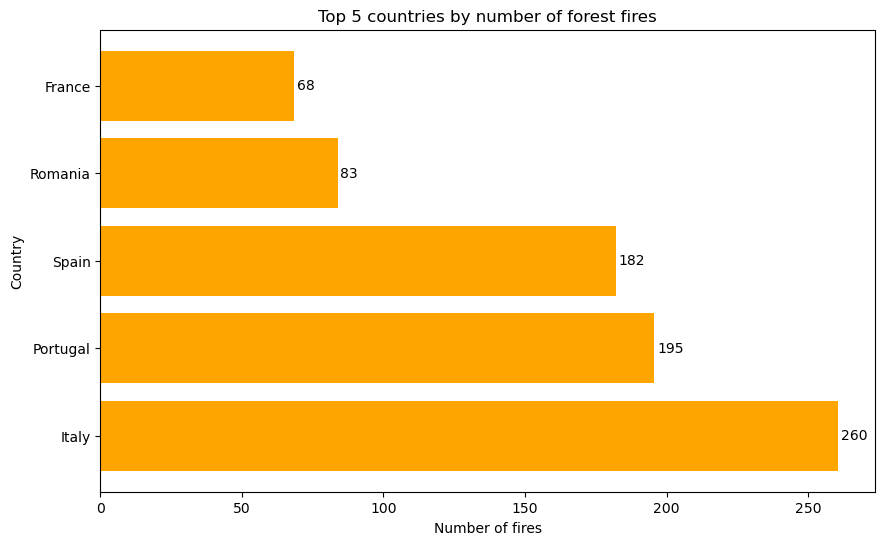

In [5]:
top_countries = nmb_of_fires.nlargest(5, 'Annual Avg.')

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_countries['Country'], top_countries['Annual Avg.'], color = 'orange')

ax.set_xlabel('Number of fires')
ax.set_ylabel('Country')
ax.set_title('Top 5 countries by number of forest fires')
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='left', va='center')


plt.show()

Top 5 država po površini zahvaćenoj požarom.

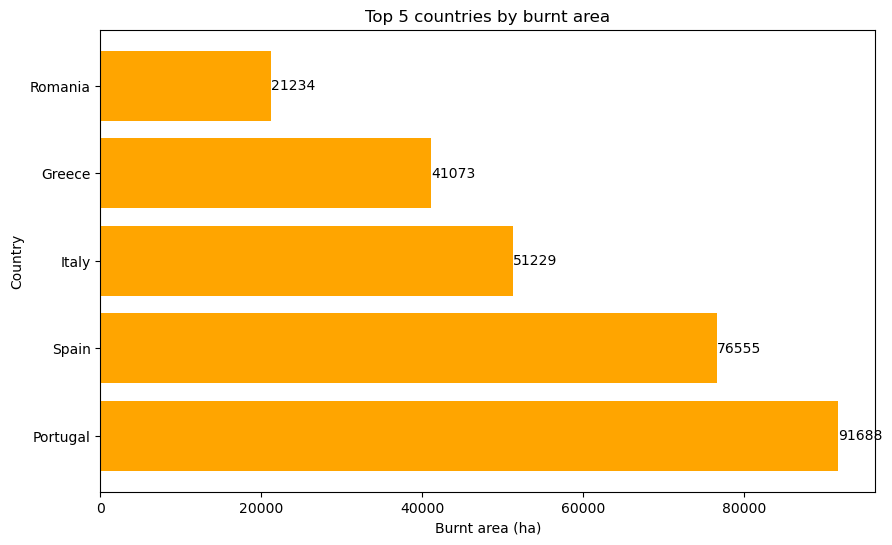

In [8]:
top_countries = fires.nlargest(5, 'Annual Avg. (ha)')

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_countries['Country'], top_countries['Annual Avg. (ha)'], color = 'orange')

ax.set_xlabel('Burnt area (ha)')
ax.set_ylabel('Country')
ax.set_title('Top 5 countries by burnt area')
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='left', va='center')


plt.show()

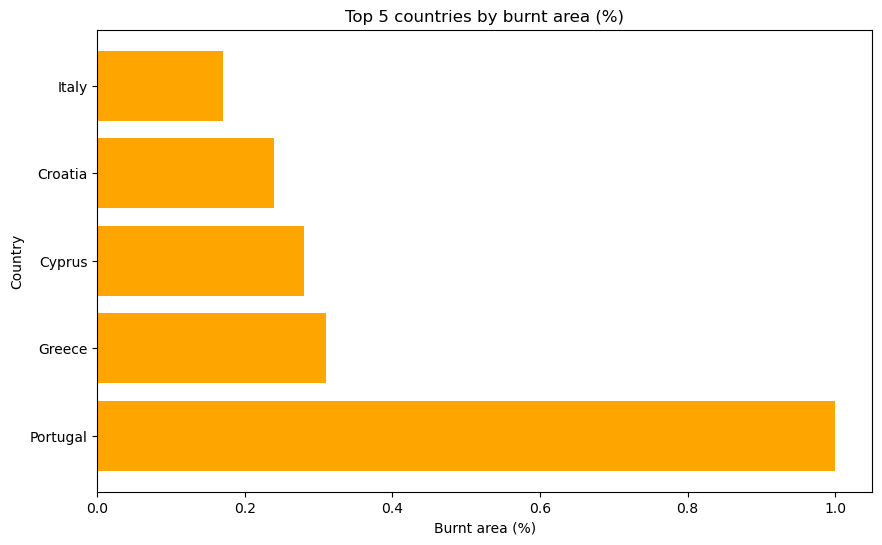

In [8]:
top_countries = fires.nlargest(5, '(*) Annual Avg. (%)')

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_countries['Country'], top_countries['(*) Annual Avg. (%)'], color = 'orange')

ax.set_xlabel('Burnt area (%)')
ax.set_ylabel('Country')
ax.set_title('Top 5 countries by burnt area (%)')


plt.show()

Ako povežemo statistike površine zahvaćene požarom i broja požara, možemo uvidjeti koliko površine po prosjeku zahvaćaju požari. U nekim državama su u prosjeku manji požari koji ne zahvate veliku površinu. Ako usporedimo Italiju i Portugal, možemo uvidjeti da iako Portugal u prosjeku ima manje požara, mnogo su opasniji i destruktivniji.

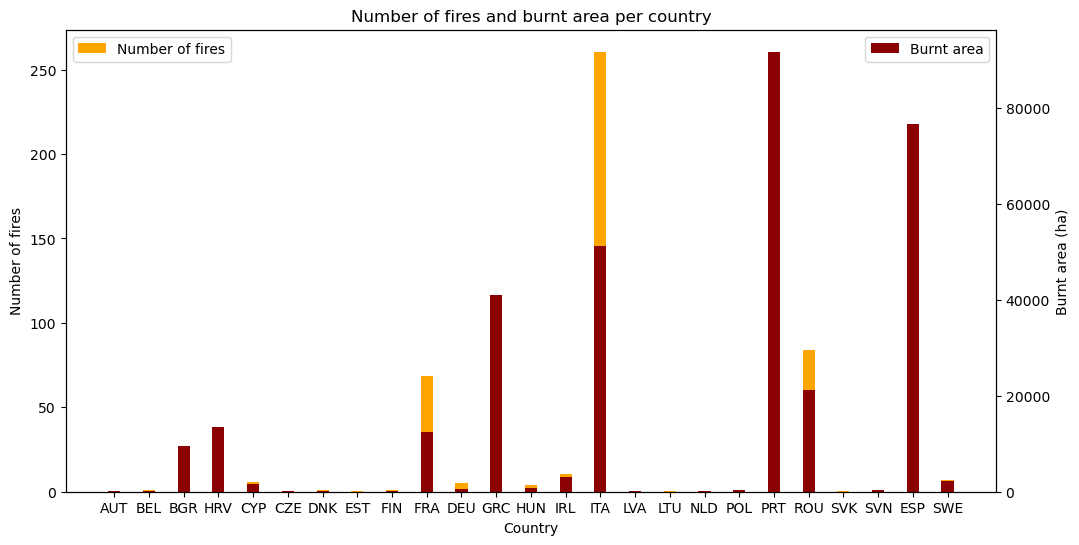

In [70]:
number_and_area = pd.merge(fires, nmb_of_fires, on='Country', how='outer')
number_and_area.head()

fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.35

bar_positions_fire1 = range(len(number_and_area))

bars_nmbr = ax1.bar(bar_positions_fire1, number_and_area['Annual Avg.'], bar_width, color='orange', label='Number of fires')

ax2 = ax1.twinx()

bars_area = ax2.bar(bar_positions_fire1, number_and_area['Annual Avg. (ha)'], bar_width, color='darkred', label='Burnt area')

ax1.set_xticks([pos for pos in bar_positions_fire1])
ax1.set_xticklabels(number_and_area['ISO3_x'])
ax1.set_ylabel('Number of fires')
ax2.set_ylabel('Burnt area (ha)')
ax1.set_xlabel('Country')
plt.title('Number of fires and burnt area per country')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Usporedba godišnjeg prosjeka broj požara s 2023. god. 

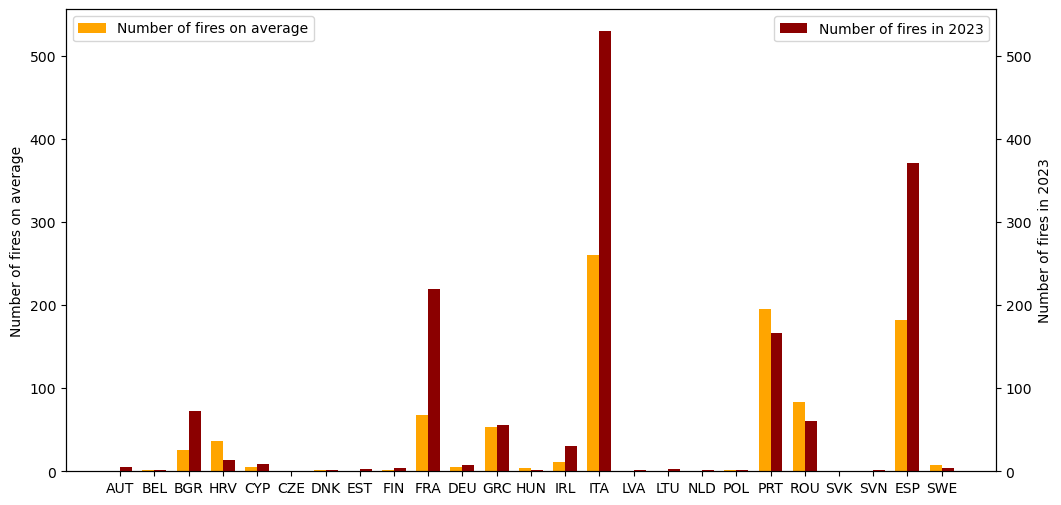

In [69]:
fig, ax1 = plt.subplots(figsize = (12, 6))

bar_width = 0.35
bar_position_1 = np.arange(len(nmb_of_fires['ISO3']))
bar_position_2 = bar_position_1 + bar_width

ax1.bar(bar_position_1, nmb_of_fires['Annual Avg.'], bar_width, color='orange', label='Number of fires on average')  
ax2 = ax1.twinx()
ax2.bar(bar_position_2, nmb_of_fires['Year 2023'], bar_width, color='darkred', label='Number of fires in 2023')

ax1.set_ylim(ax2.get_ylim())

ax1.set_xticks(bar_position_1 + bar_width / 2)
ax1.set_xticklabels(nmb_of_fires['ISO3'])
ax1.set_ylabel('Number of fires on average')
ax2.set_ylabel('Number of fires in 2023')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## 3. Broj požara po datumima
Broj požara po tjednu kroz godinu. Usporedba 2023. godine s prosjekom.

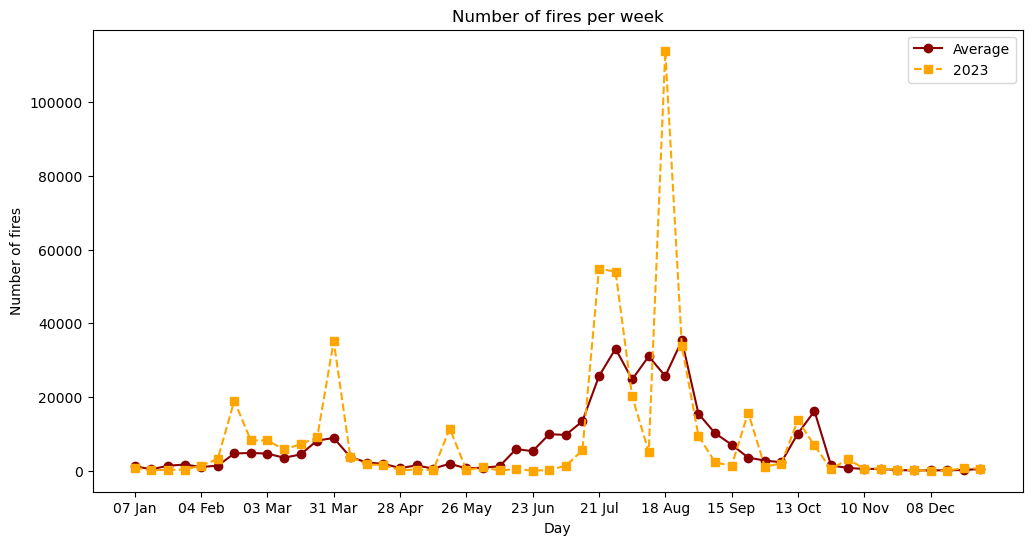

In [68]:

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(weekly_fires['Day'], weekly_fires['Average (2006 - 2023)'], label='Average', marker='o', linestyle='-', color='darkred')
ax.plot(weekly_fires['Day'], weekly_fires['Year 2023'], label='2023', marker='s', linestyle='--', color='orange')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('Number of fires')
ax.set_title('Number of fires per week')


ax.legend()


plt.show()

Varijacija broja požara po datumu (usporedba minimalnih i maksimalnih vrijednosti s prosječnom)

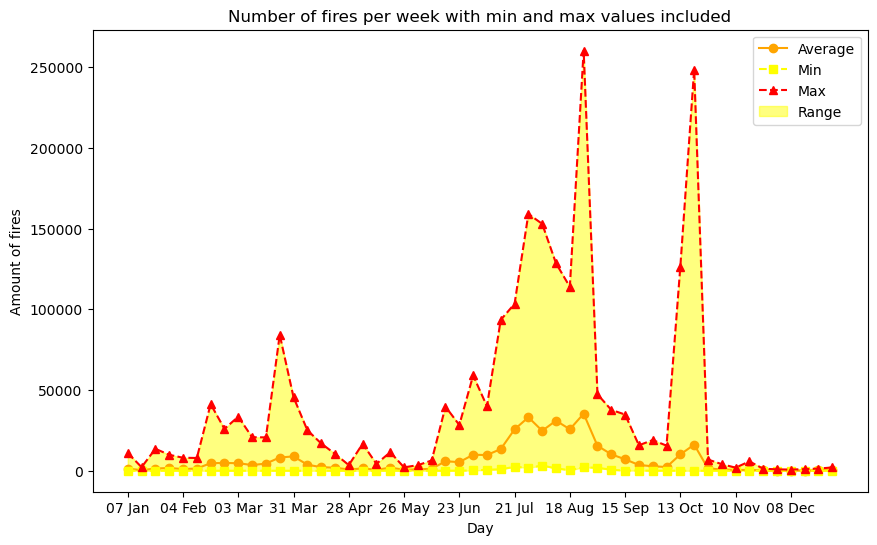

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(weekly_fires['Day'], weekly_fires['Average (2006 - 2023)'], label='Average', marker='o', linestyle='-', color='orange')
ax.plot(weekly_fires['Day'], weekly_fires['Min (2006 - 2023)'], label='Min', marker='s', linestyle='--', color='yellow')
ax.plot(weekly_fires['Day'], weekly_fires['Max (2006 - 2023)'], label='Max', marker='^', linestyle='--', color='red')

n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])

ax.fill_between(weekly_fires['Day'], weekly_fires['Min (2006 - 2023)'], weekly_fires['Max (2006 - 2023)'], color='yellow', alpha=0.5, label='Range')

ax.set_xlabel('Day')
ax.set_ylabel('Amount of fires')
ax.set_title('Number of fires per week with min and max values included')

ax.legend()

plt.show()

Datumi kada ima najviše požara u godini.


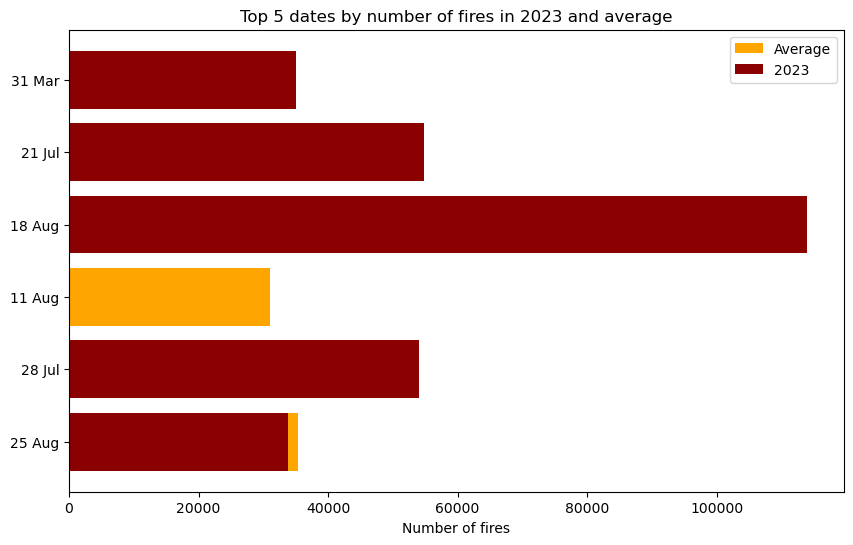

In [76]:
weekly_fires_sorted = weekly_fires.sort_values(by=['Year 2023'], ascending=True)

top5_line1 = weekly_fires_sorted.nlargest(5, 'Average (2006 - 2023)')
top5_line2 = weekly_fires_sorted.nlargest(5, 'Year 2023')

fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.barh(top5_line1['Day'], top5_line1['Average (2006 - 2023)'], color='orange', label='Average')
ax2.barh(top5_line2['Day'], top5_line2['Year 2023'], color='darkred', label='2023')

ax2.set_xlabel('Number of fires')
ax2.set_title('Top 5 dates by number of fires in 2023 and average')

ax2.legend()

plt.show()

Datumi s najmanje požara:

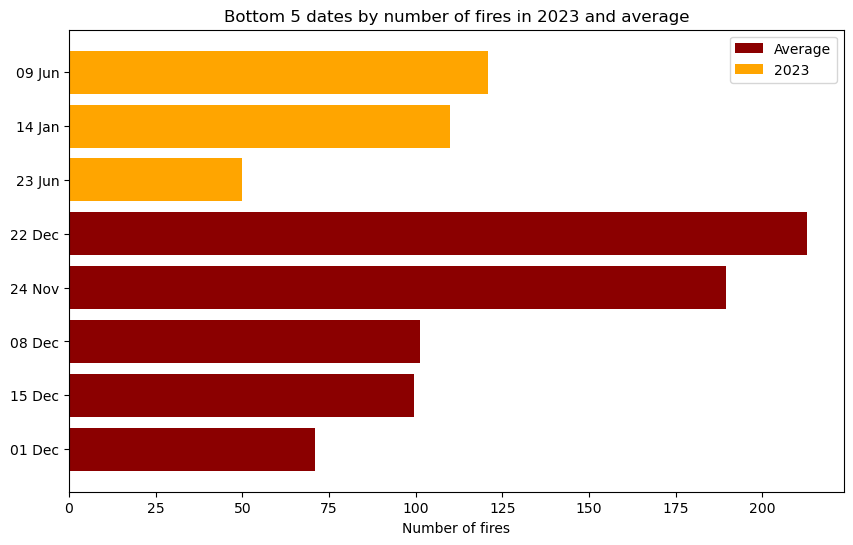

In [75]:
weekly_fires_sort = weekly_fires.sort_values(by=['Average (2006 - 2023)', 'Year 2023'], ascending=False)

top5_line1 = weekly_fires.nsmallest(5, 'Average (2006 - 2023)')
top5_line2 = weekly_fires.nsmallest(5, 'Year 2023')

fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.barh(top5_line1['Day'], top5_line1['Average (2006 - 2023)'], color='darkred', label='Average')
ax2.barh(top5_line2['Day'], top5_line2['Year 2023'], color='orange', label='2023')

ax2.set_xlabel('Number of fires')
ax2.set_title('Bottom 5 dates by number of fires in 2023 and average')

ax2.legend()

plt.show()

## 4. Termalne anomalije (VIIRS i MODIS)
Jedna od tehnologija koja se koristi za detekciju požara je VIIRS (Visible Infrared Imaging Radiometer Suite) koji pomoću infracrvenog svijetla detektira termalne anomalije na tlu koje ako su dovoljno velike mogu ukazivati na požare. 

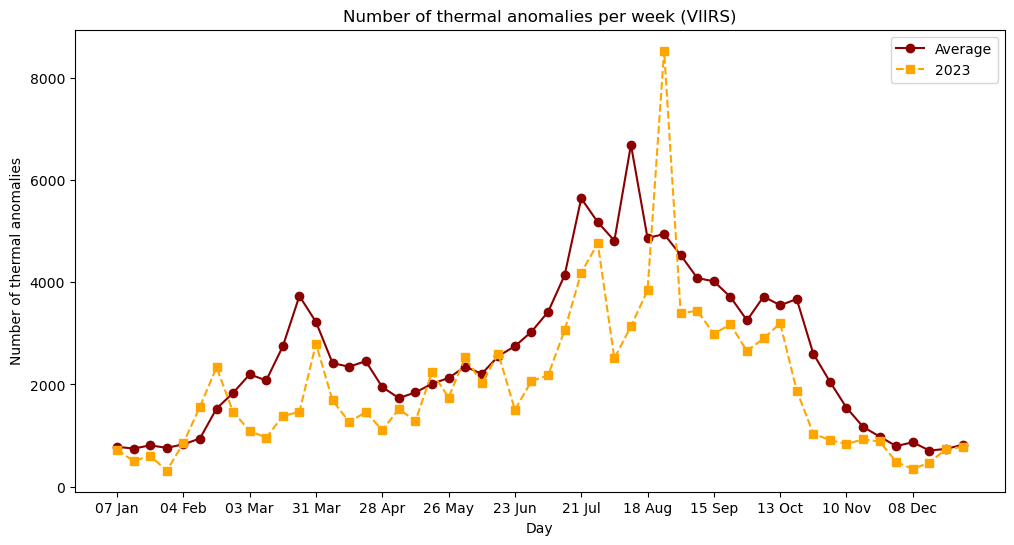

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(viirs['Day'], viirs['Average (2012 - 2023)'], label='Average', marker='o', linestyle='-', color='darkred')
ax.plot(viirs['Day'], viirs['Year 2023'], label='2023', marker='s', linestyle='--', color='orange')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('Number of thermal anomalies')
ax.set_title('Number of thermal anomalies per week (VIIRS)')


ax.legend()


plt.show()

Podudaranje VIIRS-a sa stvarnim brojem požara.

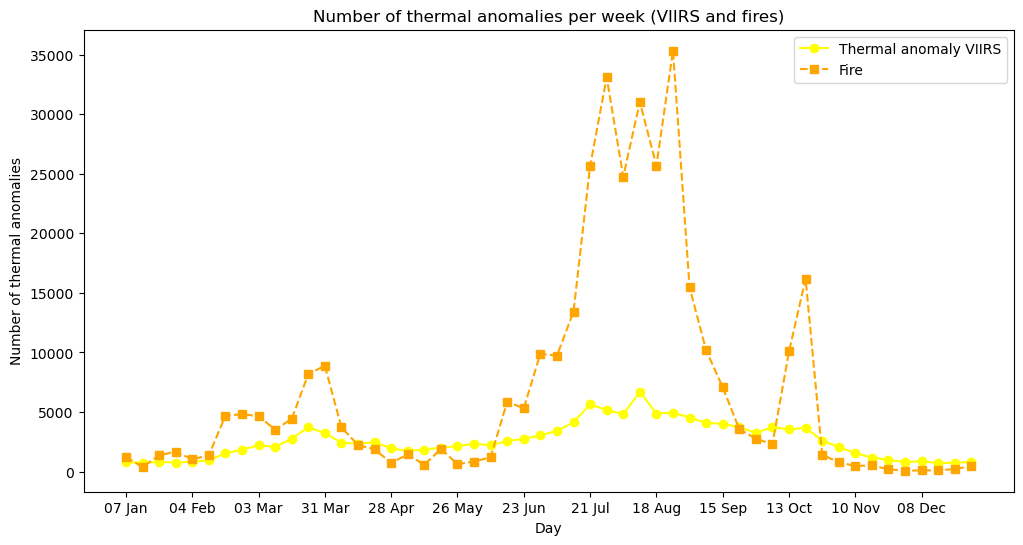

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(viirs['Day'], viirs['Average (2012 - 2023)'], label='Thermal anomaly VIIRS', marker='o', linestyle='-', color='yellow')
ax.plot(weekly_fires['Day'], weekly_fires['Average (2006 - 2023)'], label='Fire', marker='s', linestyle='--', color='orange')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('Number of thermal anomalies')
ax.set_title('Number of thermal anomalies per week (VIIRS and fires)')


ax.legend()


plt.show()

Druga tehnologija koja se također koristi u detekciji požara je MODIS (Moderate Resolution Imaging Spectroradiometer) je satelitski senzor koji se nalazi unutar Terra satelita i pomaže u proučavanju atmosfere. Njegova primarna upotreba nije za šumske požare, ali ih dosta dobro detektira stoga se i on koristi za detekciju požara.

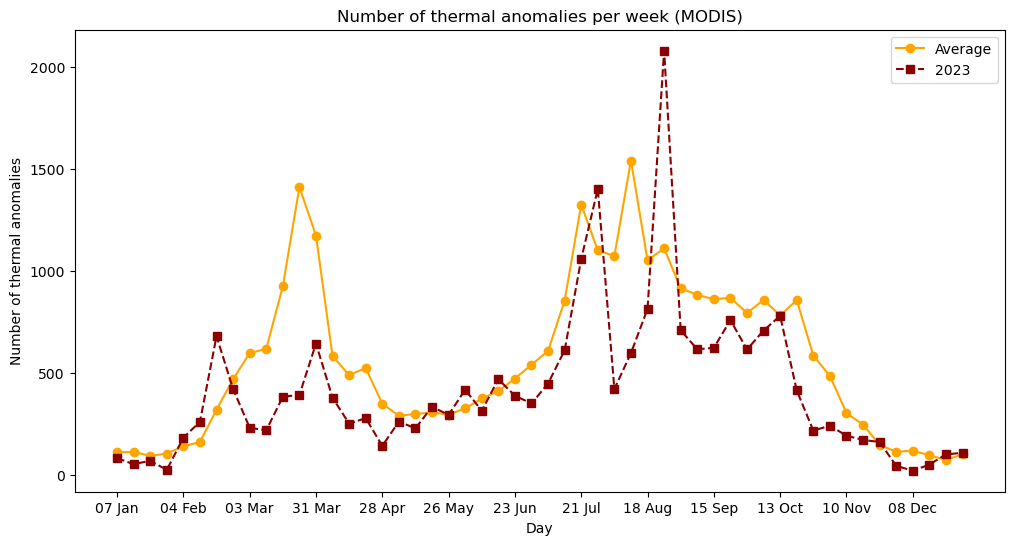

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(modis['Day'], modis['Average (2012 - 2023)'], label='Average', marker='o', linestyle='-', color='orange')
ax.plot(modis['Day'], modis['Year 2023'], label='2023', marker='s', linestyle='--', color='darkred')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('Number of thermal anomalies')
ax.set_title('Number of thermal anomalies per week (MODIS)')


ax.legend()


plt.show()

Usporedba MODIS-a i VIIRS-a. Zbog manje preciznosti, MODIS ima znatno manje detekcija od VIIRS-a.

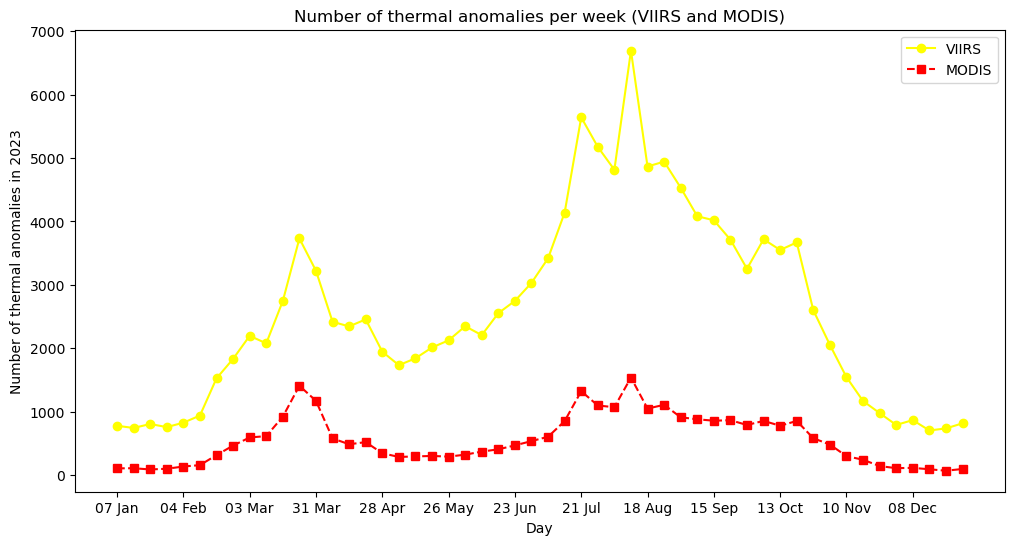

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(viirs['Day'], viirs['Average (2012 - 2023)'], label='VIIRS', marker='o', linestyle='-', color='yellow')
ax.plot(modis['Day'], modis['Average (2012 - 2023)'], label='MODIS', marker='s', linestyle='--', color='red')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('Number of thermal anomalies in 2023')
ax.set_title('Number of thermal anomalies per week (VIIRS and MODIS)')


ax.legend()


plt.show()

Usporedba MODIS-a sa službenom statistikom požara.

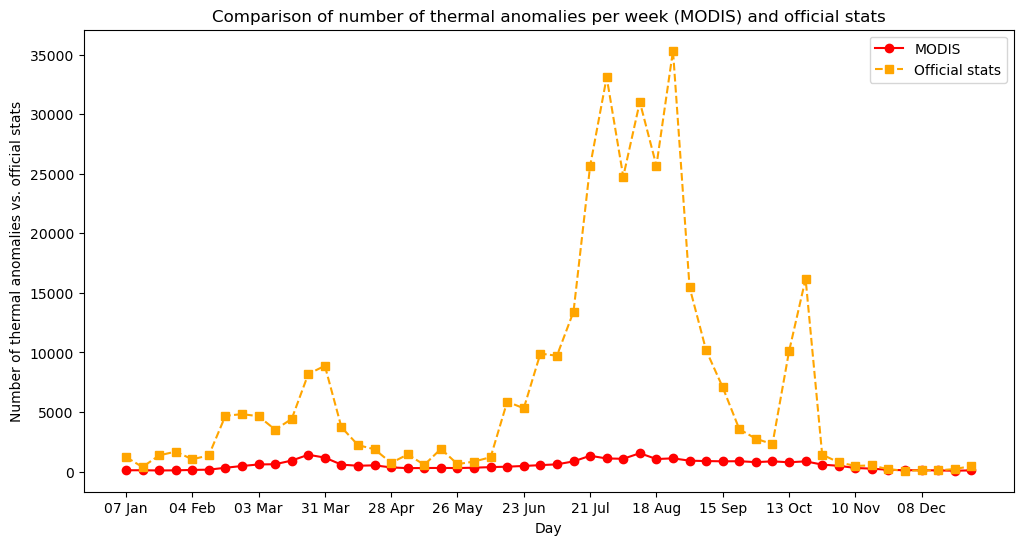

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(modis['Day'], modis['Average (2012 - 2023)'], label='MODIS', marker='o', linestyle='-', color='red')
ax.plot(weekly_fires['Day'], weekly_fires['Average (2006 - 2023)'], label='Official stats', marker='s', linestyle='--', color='orange')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('Number of thermal anomalies vs. official stats')
ax.set_title('Comparison of number of thermal anomalies per week (MODIS) and official stats')


ax.legend()


plt.show()

## 5. Emisijski plinovi
Prilikom šumskih požara, biomasa se izgaranjem pretvara u štetne emisijske plinove.

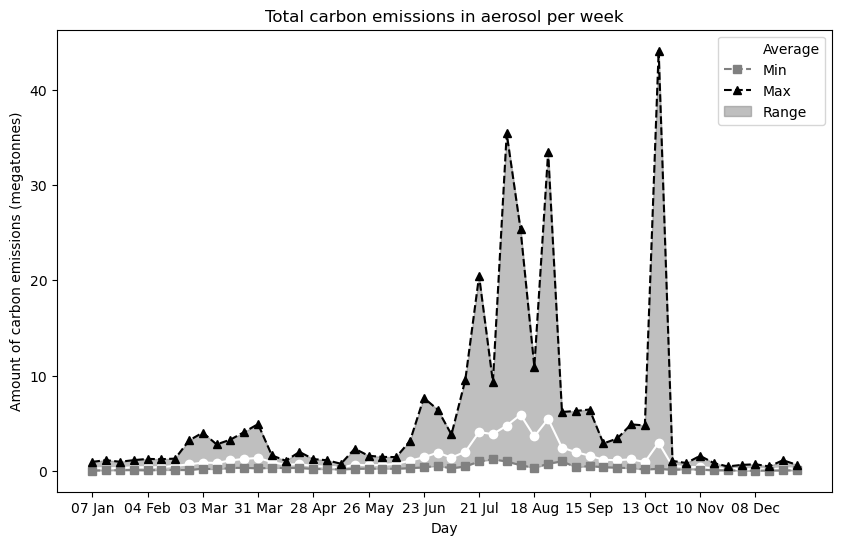

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(total_carbon['Day'], total_carbon['Average (2003 - 2023)'], label='Average', marker='o', linestyle='-', color='white')
ax.plot(total_carbon['Day'], total_carbon['Min (2003 - 2023)'], label='Min', marker='s', linestyle='--', color='gray')
ax.plot(total_carbon['Day'], total_carbon['Max (2003 - 2023)'], label='Max', marker='^', linestyle='--', color='black')

n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])

ax.fill_between(total_carbon['Day'], total_carbon['Min (2003 - 2023)'], total_carbon['Max (2003 - 2023)'], color='gray', alpha=0.5, label='Range')

ax.set_xlabel('Day')
ax.set_ylabel('Amount of carbon emissions (megatonnes)')
ax.set_title('Total carbon emissions in aerosol per week')

ax.legend()

plt.show()

Tijekom godine se nakupi i do 130 megatona raznih ugljikovih plinova.

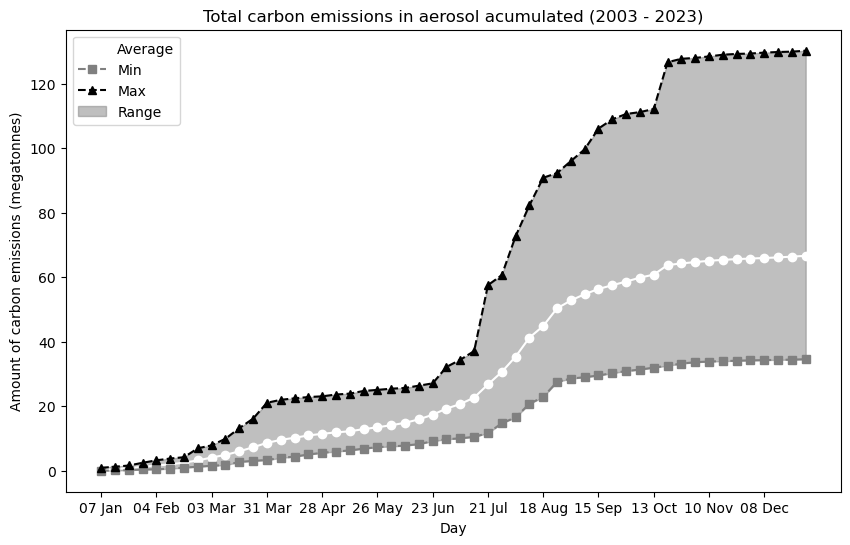

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(total_carbon_acum['Day'], total_carbon_acum['Average (2003 - 2023)'], label='Average', marker='o', linestyle='-', color='white')
ax.plot(total_carbon_acum['Day'], total_carbon_acum['Min (2003 - 2023)'], label='Min', marker='s', linestyle='--', color='gray')
ax.plot(total_carbon_acum['Day'], total_carbon_acum['Max (2003 - 2023)'], label='Max', marker='^', linestyle='--', color='black')

n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])

ax.fill_between(total_carbon_acum['Day'], total_carbon_acum['Min (2003 - 2023)'], total_carbon_acum['Max (2003 - 2023)'], color='gray', alpha=0.5, label='Range')

ax.set_xlabel('Day')
ax.set_ylabel('Amount of carbon emissions (megatonnes)')
ax.set_title('Total carbon emissions in aerosol acumulated (2003 - 2023)')

ax.legend()

plt.show()

Primarni plin koji se oslobađa tijekom šumskih požara je ugljikov dioksid (CO2). Od svih plinova koji se oslobađaju tijekom požara, najzastupljeniji je C02. Šumski požari ne uzrokuju samo velike emisije CO2 već i smanjuju kapacitet biomase da upije taj isti CO2.

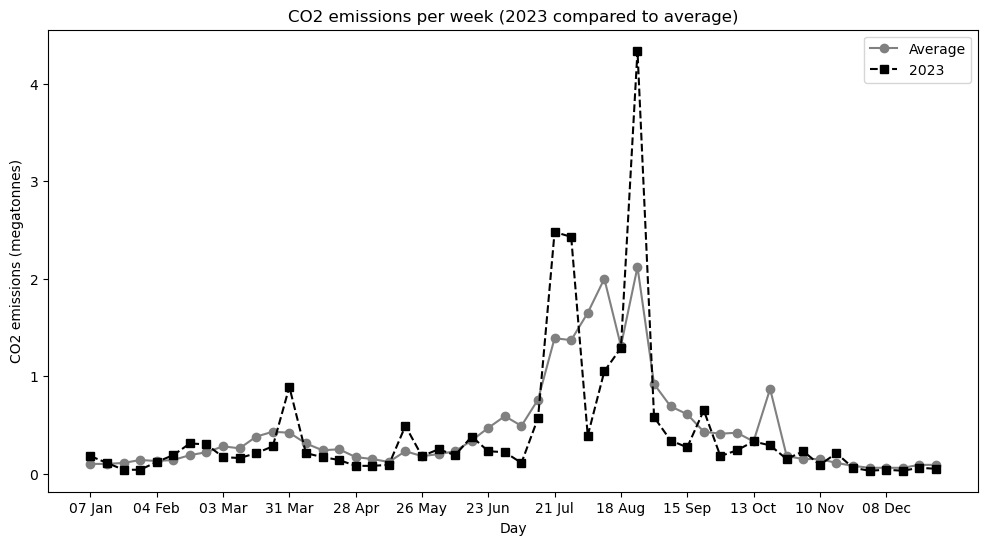

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(c02['Day'], c02['Average (2003 - 2023)'], label='Average', marker='o', linestyle='-', color='gray')
ax.plot(c02['Day'], c02['Year 2023'], label='2023', marker='s', linestyle='--', color='black')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('CO2 emissions (megatonnes)')
ax.set_title('CO2 emissions per week (2023 compared to average)')


ax.legend()


plt.show()

Drugi plin koji je vrijedan spomena i ima značajnu ulogu u šumskim požarima je metan (CH4).

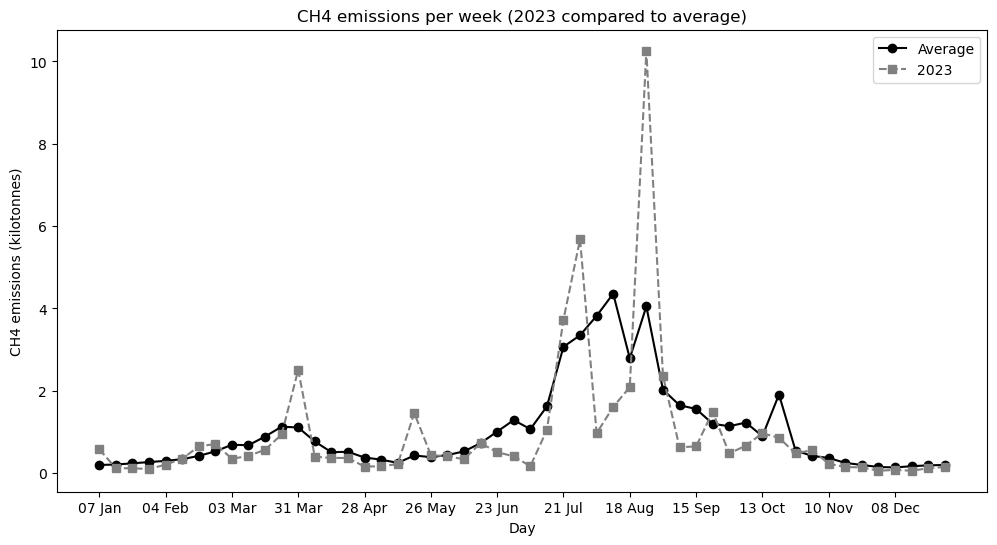

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(ch4['Day'], ch4['Average (2003 - 2023)'], label='Average', marker='o', linestyle='-', color='black')
ax.plot(ch4['Day'], ch4['Year 2023'], label='2023', marker='s', linestyle='--', color='gray')


n = 4
xticks = ax.get_xticks()
ax.set_xticks(xticks[::n])


ax.set_xlabel('Day')
ax.set_ylabel('CH4 emissions (kilotonnes)')
ax.set_title('CH4 emissions per week (2023 compared to average)')


ax.legend()


plt.show()